In [12]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
#read dataset
df = pd.read_csv("Car.csv")

In [15]:
df.drop(columns = ['New_Price'],axis = 1,inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Honda Civic,Pune,2011.0,47000.0,Petrol,Automatic,Second,13.9 kmpl,1799 CC,130.3 bhp,Others,5.0,4.0,4.50
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,Black/Silver,5.0,4.0,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,Black/Silver,5.0,4.0,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,Black/Silver,2.0,2.0,55.54


In [16]:
df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  Price              5961 non-null   float64
dtypes: float64(5), object(9)
memory usage: 652.1+ KB


In [18]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour',
       'Seats', 'No. of Doors', 'Price'],
      dtype='object')

In [19]:
df[['Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour',]]

,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others
...,...,...,...,...,...,...,...
5956,Petrol,Automatic,Second,13.9 kmpl,1799 CC,130.3 bhp,Others
5957,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,Black/Silver
5958,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,Black/Silver
5959,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,Black/Silver


In [20]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5889 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5889 non-null   object 
 1   Location           5889 non-null   object 
 2   Year               5889 non-null   float64
 3   Kilometers_Driven  5889 non-null   float64
 4   Fuel_Type          5889 non-null   object 
 5   Transmission       5889 non-null   object 
 6   Owner_Type         5889 non-null   object 
 7   Mileage            5889 non-null   object 
 8   Engine             5889 non-null   object 
 9   Power              5889 non-null   object 
 10  Colour             5889 non-null   object 
 11  Seats              5889 non-null   float64
 12  No. of Doors       5889 non-null   float64
 13  Price              5889 non-null   float64
dtypes: float64(5), object(9)
memory usage: 690.1+ KB


In [21]:
df['Power'].value_counts().head(10)

Power
74 bhp       231
98.6 bhp     128
73.9 bhp     124
140 bhp      123
78.9 bhp     111
67.1 bhp     106
67.04 bhp    105
null bhp     103
82 bhp       100
88.5 bhp      97
Name: count, dtype: int64

In [22]:
# Replace 'null bhp' with NaN in the 'Power' column
df['Power'].replace('null bhp',np.nan,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5786 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5786 non-null   object 
 1   Location           5786 non-null   object 
 2   Year               5786 non-null   float64
 3   Kilometers_Driven  5786 non-null   float64
 4   Fuel_Type          5786 non-null   object 
 5   Transmission       5786 non-null   object 
 6   Owner_Type         5786 non-null   object 
 7   Mileage            5786 non-null   object 
 8   Engine             5786 non-null   object 
 9   Power              5786 non-null   object 
 10  Colour             5786 non-null   object 
 11  Seats              5786 non-null   float64
 12  No. of Doors       5786 non-null   float64
 13  Price              5786 non-null   float64
dtypes: float64(5), object(9)
memory usage: 678.0+ KB


In [24]:
def takeOutTheFloat(x):
    return re.findall(r'\d+(?:\.\d+)?', x)[0]

In [25]:
df['Mileage'] = df['Mileage'].apply(lambda x : takeOutTheFloat(x))
df['Engine'] = df['Engine'].apply(lambda x : takeOutTheFloat(x))
df['Power'] = df['Power'].apply(lambda x : takeOutTheFloat(x))
df[['Mileage','Engine','Power']] = df[['Mileage','Engine','Power']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5786 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5786 non-null   object 
 1   Location           5786 non-null   object 
 2   Year               5786 non-null   float64
 3   Kilometers_Driven  5786 non-null   float64
 4   Fuel_Type          5786 non-null   object 
 5   Transmission       5786 non-null   object 
 6   Owner_Type         5786 non-null   object 
 7   Mileage            5786 non-null   float64
 8   Engine             5786 non-null   float64
 9   Power              5786 non-null   float64
 10  Colour             5786 non-null   object 
 11  Seats              5786 non-null   float64
 12  No. of Doors       5786 non-null   float64
 13  Price              5786 non-null   float64
dtypes: float64(8), object(6)
memory usage: 678.0+ KB


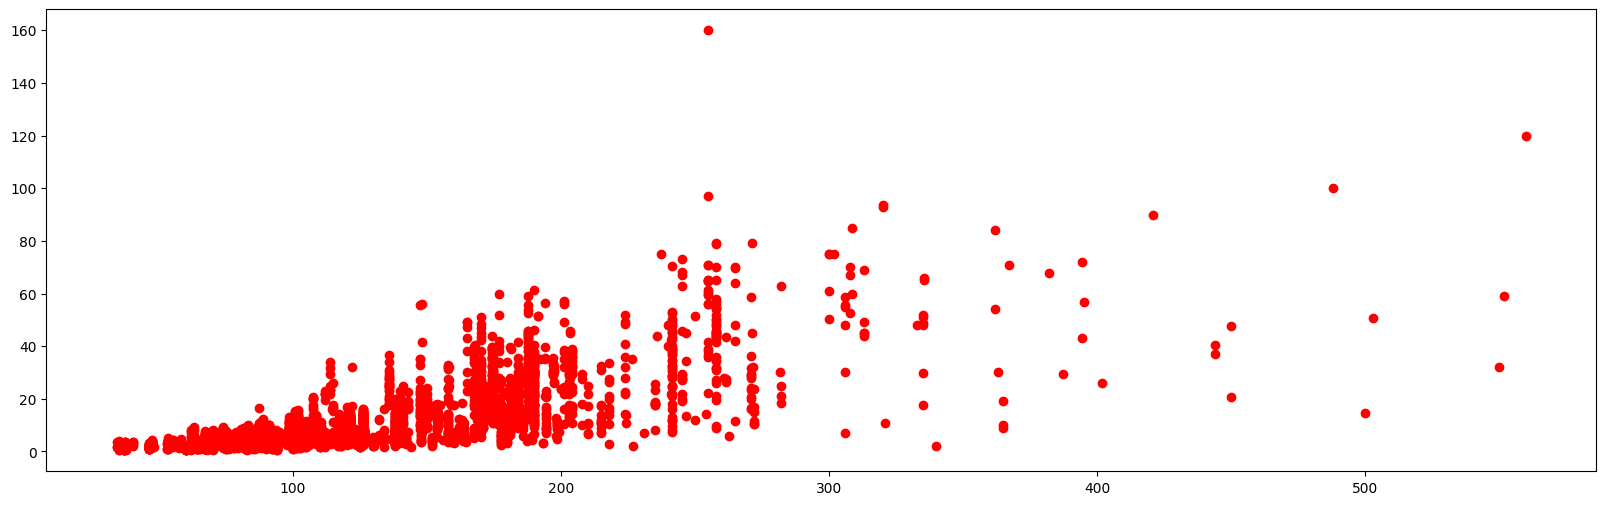

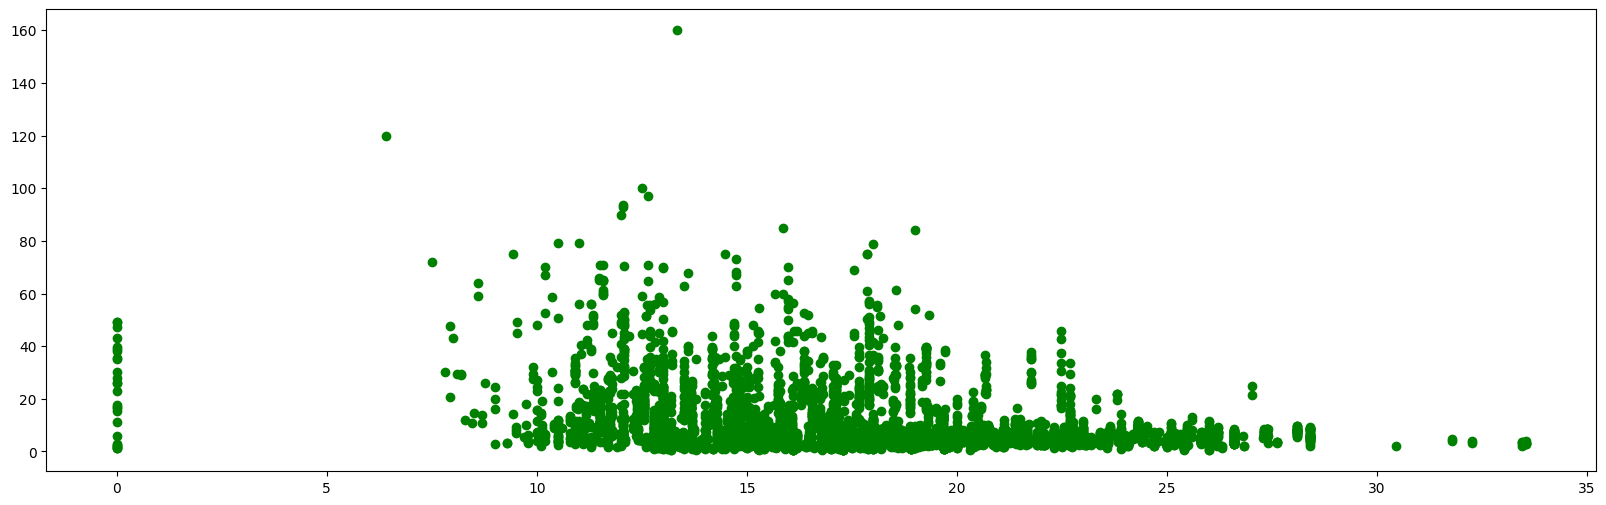

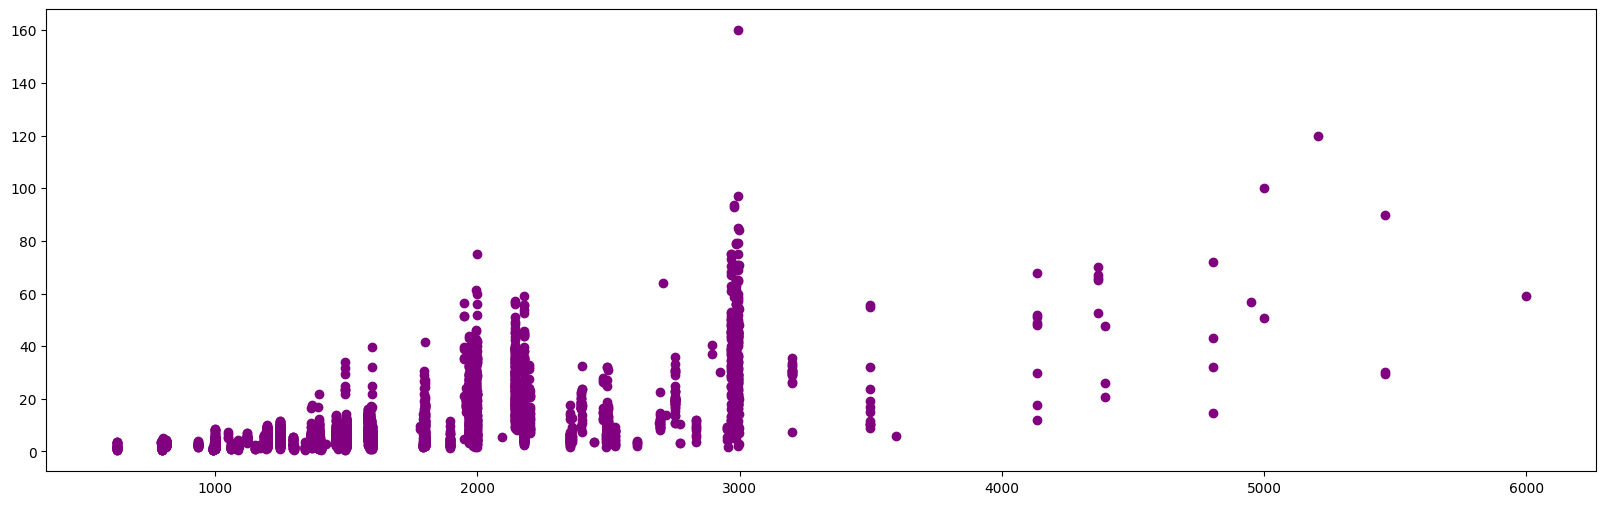

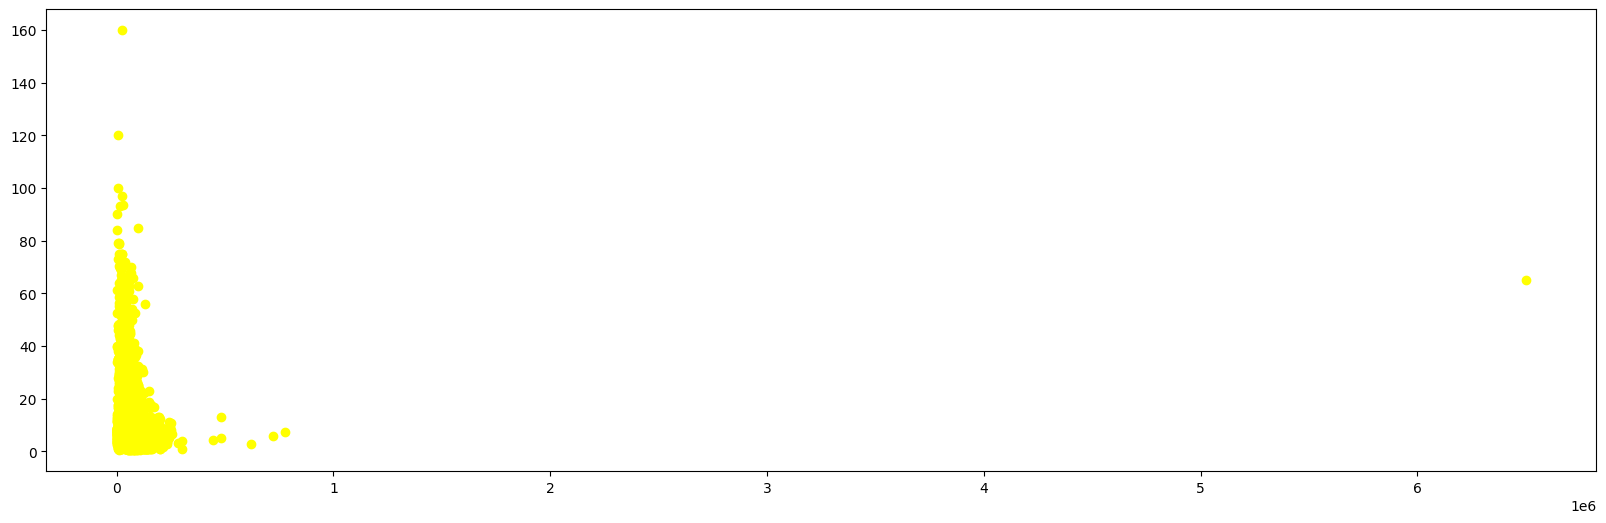

In [26]:
plt.figure(figsize=(20, 6))
plt.scatter(df['Power'],df['Price'],color='red')
plt.figure(figsize=(20, 6))
plt.scatter(df['Mileage'],df['Price'],color='green')
plt.figure(figsize=(20, 6))
plt.scatter(df['Engine'],df['Price'],color='purple')
plt.figure(figsize=(20, 6))
plt.scatter(df['Kilometers_Driven'],df['Price'],color='yellow')

In [27]:
df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

Location
Mumbai        760
Hyderabad     710
Kochi         635
Coimbatore    620
Pune          585
Delhi         539
Kolkata       512
Chennai       471
Jaipur        394
Bangalore     341
Ahmedabad     219
Name: Location, dtype: int64

In [28]:
df.groupby('Seats')['Seats'].agg('count').sort_values(ascending=False)

Seats
5.0     4860
7.0      667
8.0      115
4.0       98
6.0       29
2.0       13
9.0        2
10.0       2
Name: Seats, dtype: int64

In [29]:
df_group_seats = df.groupby('Seats')['Seats'].agg('count').sort_values(ascending=False)
df_group_seats

Seats
5.0     4860
7.0      667
8.0      115
4.0       98
6.0       29
2.0       13
9.0        2
10.0       2
Name: Seats, dtype: int64

In [30]:
df_group_seats_less = df_group_seats[df_group_seats < 10]
df_group_seats_less

Seats
9.0     2
10.0    2
Name: Seats, dtype: int64

In [31]:
df['Seats'] = df['Seats'].apply(lambda x : 'other' if x in df_group_seats_less else x)
df = df[df.Seats.isin(['other']) == False]
df['Seats'].value_counts()

Seats
5.0    4860
7.0     667
8.0     115
4.0      98
6.0      29
2.0      13
Name: count, dtype: int64

In [32]:
df_groupby_door = df.groupby('No. of Doors')['No. of Doors'].agg('count').sort_values(ascending=False)
df_groupby_door

No. of Doors
4.0    5064
5.0     705
2.0      13
Name: No. of Doors, dtype: int64

In [33]:
df_groupby_door_less = df_groupby_door[df_groupby_door < 20]
df_groupby_door_less

No. of Doors
2.0    13
Name: No. of Doors, dtype: int64

In [34]:
df['No. of Doors'] = df['No. of Doors'].apply(lambda x : 'other' if x in df_groupby_door_less else x)
df = df[df['No. of Doors'].isin(['other']) == False]
df['No. of Doors'].value_counts()

<ipython-input-34-30cadc57044b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No. of Doors'] = df['No. of Doors'].apply(lambda x : 'other' if x in df_groupby_door_less else x)


No. of Doors
4.0    5064
5.0     705
Name: count, dtype: int64

In [35]:
df.groupby('Owner_Type')['Owner_Type'].agg('count').sort_values(ascending=False)

Owner_Type
First             4757
Second             911
Third               95
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [36]:
df_group_by_ownertype = df.groupby('Owner_Type')['Owner_Type'].agg('count').sort_values(ascending=False)
df_group_by_ownertype

Owner_Type
First             4757
Second             911
Third               95
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [37]:
df_group_by_ownertype_less = df_group_by_ownertype[df_group_by_ownertype < 100]
df_group_by_ownertype_less

Owner_Type
Third             95
Fourth & Above     6
Name: Owner_Type, dtype: int64

In [38]:
df['Owner_Type'] = df['Owner_Type'].apply(lambda x : 'other' if x in df_group_by_ownertype_less else x)
df['Owner_Type'].value_counts()
df = df[df['Owner_Type'].isin(['other']) == False]

In [39]:
df_group_by_Transmission = df.groupby('Transmission')['Transmission'].agg('count').sort_values(ascending=False)
df_group_by_Transmission

Transmission
Manual       4020
Automatic    1648
Name: Transmission, dtype: int64

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Transmission'].value_counts()

Transmission
1    4020
0    1648
Name: count, dtype: int64

In [42]:
df_groupby_Fuel_Type = df.groupby('Fuel_Type')['Fuel_Type'].agg('count').sort_values(ascending=False)
df_groupby_Fuel_Type

Fuel_Type
Diesel    3060
Petrol    2545
CNG         54
LPG          9
Name: Fuel_Type, dtype: int64

In [43]:
df_groupby_Fuel_Type_less = df_groupby_Fuel_Type[df_groupby_Fuel_Type < 100]
df_groupby_Fuel_Type_less

Fuel_Type
CNG    54
LPG     9
Name: Fuel_Type, dtype: int64

In [44]:
df['Fuel_Type'] = df['Fuel_Type'].apply(lambda x : 'other' if x in df_groupby_Fuel_Type_less else x)
df['Fuel_Type']

df = df[df['Fuel_Type'].isin(['Fuel_Type']) == False]

In [45]:
df.groupby('Fuel_Type')['Fuel_Type'].agg('count').sort_values(ascending=False)

Fuel_Type
Diesel    3060
Petrol    2545
other       63
Name: Fuel_Type, dtype: int64

In [46]:
df.groupby('Name')['Name'].agg('count').sort_values(ascending=False)

Name
Maruti Swift     319
Honda City       258
Hyundai i20      242
Hyundai Verna    166
Toyota Innova    157
                ... 
Ford Classic       1
Isuzu MUX          1
Ford Fusion        1
Ford Mustang       1
Nissan Evalia      1
Name: Name, Length: 195, dtype: int64

In [47]:
df_group_by_name = df.groupby('Name')['Name'].agg('count').sort_values(ascending=False)
df_group_by_name

Name
Maruti Swift     319
Honda City       258
Hyundai i20      242
Hyundai Verna    166
Toyota Innova    157
                ... 
Ford Classic       1
Isuzu MUX          1
Ford Fusion        1
Ford Mustang       1
Nissan Evalia      1
Name: Name, Length: 195, dtype: int64

In [48]:
df_group_by_name_less = df_group_by_name[df_group_by_name < 5]
df_group_by_name_less

Name
Tata Sumo                  4
Tata Bolt                  4
Tata Hexa                  4
Volvo V40                  4
Volkswagen CrossPolo       4
Renault Fluence            4
Audi A3                    4
Ford Aspire                4
Mercedes-Benz R-Class      4
Mahindra Verito            4
Fiat Avventura             4
Honda WRV                  3
Maruti S-Cross             3
Hyundai Tucson             3
Tata Xenon                 3
Ford Freestyle             3
Jaguar XE                  3
Mahindra NuvoSport         3
Force One                  3
Maruti Grand               3
Mercedes-Benz C-Class      3
Tata Nexon                 3
Chevrolet Enjoy            3
Renault Koleos             3
BMW 1                      3
Renault Captur             3
Nissan X-Trail             3
Audi A7                    3
Honda BR-V                 3
Fiat Punto                 2
Chevrolet Captiva          2
Audi RS5                   2
Volvo S80                  2
Audi A8                    2
Volvo XC9

In [49]:
df['Name'] = df['Name'].apply(lambda x : 'other' if x in df_group_by_name_less else x)
df['Name'].value_counts()

Name
Maruti Swift       319
Honda City         258
Hyundai i20        242
Hyundai Verna      166
Toyota Innova      157
                  ... 
Honda BRV            5
Fiat Grande          5
Mahindra Quanto      5
Renault Pulse        5
Tata Tigor           5
Name: count, Length: 136, dtype: int64

In [50]:
df = df[df['Name'].isin(['other']) == False]
df['Seats'].value_counts()

Seats
5.0    4679
7.0     622
8.0     110
4.0      88
6.0      28
Name: count, dtype: int64

In [51]:
df['Seats'].value_counts()

Seats
5.0    4679
7.0     622
8.0     110
4.0      88
6.0      28
Name: count, dtype: int64

In [52]:
dummies = pd.get_dummies(df.Colour)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Colour',axis = 1,inplace=True)
dummies = pd.get_dummies(df.Location)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Location',axis = 1,inplace=True)
dummies = pd.get_dummies(df.Name)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Name',axis = 1,inplace=True)
dummies = pd.get_dummies(df.Owner_Type)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Owner_Type',axis = 1,inplace=True)
dummies = pd.get_dummies(df.Year)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Year',axis = 1,inplace=True)
dummies = pd.get_dummies(df.Fuel_Type)
df = pd.concat([df,dummies],axis = 'columns')
df.drop('Fuel_Type',axis = 1,inplace=True)

In [53]:
df

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats,No. of Doors,Price,Black/Silver,Others,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,Diesel,Petrol,other
1,18678.0,1,21.10,998.0,100.0,5.0,4.0,8.32,False,True,...,False,False,False,False,False,True,False,False,True,False
2,197000.0,1,11.68,2498.0,112.0,7.0,5.0,4.00,False,False,...,True,False,False,False,False,False,False,True,False,False
3,45000.0,1,24.00,1120.0,70.0,5.0,4.0,3.49,False,False,...,False,True,False,False,False,False,False,True,False,False
4,65000.0,1,12.80,2494.0,102.0,8.0,5.0,6.40,False,True,...,False,False,False,False,False,False,False,True,False,False
6,79000.0,1,24.80,1396.0,88.7,5.0,4.0,7.25,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,29279.0,1,24.70,1047.0,69.0,5.0,4.0,7.46,True,False,...,False,False,False,False,False,False,True,True,False,False
5956,47000.0,0,13.90,1799.0,130.3,5.0,4.0,4.50,False,True,...,False,False,False,False,False,False,False,False,True,False
5957,63777.0,1,18.50,1197.0,82.9,5.0,4.0,3.67,True,False,...,True,False,False,False,False,False,False,False,True,False
5958,37806.0,1,20.40,1197.0,81.8,5.0,4.0,5.20,True,False,...,False,False,False,True,False,False,False,False,True,False


In [54]:
X = df.drop(['Price'],axis = 'columns')
X.head()
X.columns = X.columns.astype(str)
Y = df.Price
Y

1       8.32
2       4.00
3       3.49
4       6.40
6       7.25
        ... 
5955    7.46
5956    4.50
5957    3.67
5958    5.20
5960    3.60
Name: Price, Length: 5527, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 30)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_train,Y_train)

0.8620898155607808

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
Y_pred = lr_clf.predict(X_test)


In [58]:
mse = mean_squared_error(Y_test,Y_pred,squared = False)
mae=mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Coefficient of detemination = : {r2}")
print(f"Mean Absolute error = : {mae}")
print(f"Mean Sqaured error = : {mse}")

Coefficient of detemination = : -22505159.691576228
Mean Absolute error = : 1186.6151180676413
Mean Sqaured error = : 48233.07570351583
